# Select DNA-MERFISH codes from existing repository

by Pu Zheng

2021.4.6

[link to selected covering set](https://ljcr.dmgordon.org/cover/show_cover.php?v=99&k=3&t=2)

In [1]:
%run "..\..\Startup_py3.py"
sys.path.append(r"..\..\..\..\Documents")

import ImageAnalysis3 as ia
%matplotlib notebook

from ImageAnalysis3 import *
print(os.getpid())

# library design specific tools
from ImageAnalysis3.library_tools import LibraryDesigner as ld
from ImageAnalysis3.library_tools import LibraryTools as lt
# biopython imports
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio.Blast.Applications import NcbiblastnCommandline
from Bio.Blast import NCBIXML

28468


In [233]:
## Some folders
# human genome
reference_folder = r'\\10.245.74.212\Chromatin_NAS_2\Libraries\Genomes\mouse\GRCm38_ensembl'
genome_folder = os.path.join(reference_folder, 'Genome')
# Library directories
pool_folder = r'\\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire'
library_folder = os.path.join(pool_folder, f'SuperEnhancers')
encoding_folder = os.path.join(pool_folder, 'Encoding_design')
if not os.path.exists(encoding_folder):
    os.makedirs(encoding_folder)
    print(encoding_folder)


\\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\Encoding_design


In [236]:
encoding_file = os.path.join(pool_folder, 'covering_v_99_k_3_t_2.txt')
encoding_bits = []

with open(encoding_file, 'r') as _handle:
    # start reading
    _lines = _handle.read().split('\n')
    for _line in _lines:
        _bits = [int(_i)-1 for _i in _line.split(' ') if len(_i) > 0]
        encoding_bits.append(_bits)

encoding_bits = np.array(encoding_bits, dtype=np.int)

In [278]:
def convert_matrix_to_bits(matrix):
    return np.array([np.where(_r>0)[0] for _r in matrix], dtype=np.int)

def convert_bits_to_matrix(bits):
    _matrix = np.ones([len(bits), np.max(bits)+1], dtype=np.int) * -1
    for _i, _b in enumerate(bits):
        _matrix[_i, _b] = 1
    return _matrix
    
def expand_matrix(mat, hamming_dist=3, num_bits=None, on_bits=None, verbose=True):
    import itertools
    import random
    if num_bits is None:
        num_bits = int(len(mat[0]))
    if on_bits is None:
        on_bits = int(np.sum(mat[0]>0))
    if verbose:
        print(f"previous num of bits: {num_bits}, on bits: {on_bits}")
        _start_time = time.time()
    # initialize with appending existing solutions
    _new_matrix = [np.append(_c, -1) for _c in mat]
    # generate new solutions, which has 1 in the last bit
    _combs = list(itertools.combinations(range(num_bits), on_bits-1))
    random.shuffle(_combs)
    #print(len(_combs), _combs)
    for _b in _combs:
        # generate new binary code
        _new_c = np.ones(num_bits, dtype=np.int) * -1
        _new_c[np.array(_b)] = 1
        _new_c = np.append(_new_c, 1)
        # intersect, calculate 2x_hemming distances
        _2xh_dists = (num_bits+1) - np.array(_new_matrix) @ _new_c 
        #print(_new_matrix, _new_c, np.min(_2xh_dists))
        # check whether this passed threshold
        if np.min(_2xh_dists) >= 2 * hamming_dist:
            _new_matrix.append(_new_c)
            
            #print(_b, len(_new_matrix), _2xh_dists)
    if verbose:
        print(f"{len(_new_matrix)} selected for {num_bits+1} bits in {time.time()-_start_time:.3f}s.")
    return np.array(_new_matrix)
        

In [305]:
# initialize with current 99 bit case
#encoding_matrix_dict = {np.max(encoding_bits)+1: convert_bits_to_matrix(encoding_bits)}
encoding_matrix_dict = {3: np.ones([1,3], dtype=np.int)}

In [467]:
combs = list(itertools.combinations(range(5),2))
print(combs)
random.shuffle(combs)
print(combs)

[(0, 1), (0, 2), (0, 3), (0, 4), (1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4)]
[(1, 4), (2, 3), (2, 4), (0, 2), (0, 1), (1, 3), (0, 4), (3, 4), (0, 3), (1, 2)]


In [306]:
for _i in range(max(list(encoding_matrix_dict.keys())),160):
    encoding_matrix_dict[_i+1] = expand_matrix(encoding_matrix_dict[_i], hamming_dist=3, on_bits=3)

previous num of bits: 3, on bits: 3
1 selected for 4 bits in 0.003s.
previous num of bits: 4, on bits: 3
2 selected for 5 bits in 0.001s.
previous num of bits: 5, on bits: 3
4 selected for 6 bits in 0.000s.
previous num of bits: 6, on bits: 3
7 selected for 7 bits in 0.003s.
previous num of bits: 7, on bits: 3
7 selected for 8 bits in 0.002s.
previous num of bits: 8, on bits: 3
8 selected for 9 bits in 0.002s.
previous num of bits: 9, on bits: 3
10 selected for 10 bits in 0.002s.
previous num of bits: 10, on bits: 3
13 selected for 11 bits in 0.002s.
previous num of bits: 11, on bits: 3
17 selected for 12 bits in 0.003s.
previous num of bits: 12, on bits: 3
22 selected for 13 bits in 0.003s.
previous num of bits: 13, on bits: 3
26 selected for 14 bits in 0.003s.
previous num of bits: 14, on bits: 3
32 selected for 15 bits in 0.005s.
previous num of bits: 15, on bits: 3
35 selected for 16 bits in 0.005s.
previous num of bits: 16, on bits: 3
39 selected for 17 bits in 0.007s.
previous nu

1994 selected for 116 bits in 8.920s.
previous num of bits: 116, on bits: 3
2034 selected for 117 bits in 9.281s.
previous num of bits: 117, on bits: 3
2072 selected for 118 bits in 9.642s.
previous num of bits: 118, on bits: 3
2110 selected for 119 bits in 9.991s.
previous num of bits: 119, on bits: 3
2148 selected for 120 bits in 10.386s.
previous num of bits: 120, on bits: 3
2187 selected for 121 bits in 15.516s.
previous num of bits: 121, on bits: 3
2226 selected for 122 bits in 16.400s.
previous num of bits: 122, on bits: 3
2264 selected for 123 bits in 16.763s.
previous num of bits: 123, on bits: 3
2303 selected for 124 bits in 17.589s.
previous num of bits: 124, on bits: 3
2342 selected for 125 bits in 18.201s.
previous num of bits: 125, on bits: 3
2382 selected for 126 bits in 18.715s.
previous num of bits: 126, on bits: 3
2422 selected for 127 bits in 19.435s.
previous num of bits: 127, on bits: 3
2462 selected for 128 bits in 19.332s.
previous num of bits: 128, on bits: 3
250

In [302]:
pickle.dump(encoding_matrix_dict, open(os.path.join(encoding_folder, 'parsimonious_from_99_onbit_3_hdist_3.pkl'), 'wb'))

<IPython.core.display.Javascript object>


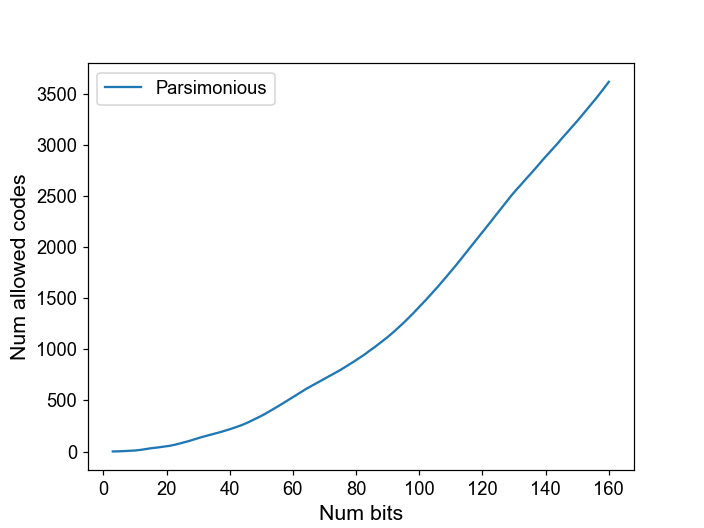

In [528]:
plt.figure()
plt.plot( list(encoding_matrix_dict.keys()), [len(_v) for _k, _v in encoding_matrix_dict.items()], label='Parsimonious')
plt.xlabel('Num bits', fontsize=14)
plt.ylabel('Num allowed codes', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.show()

<IPython.core.display.Javascript object>


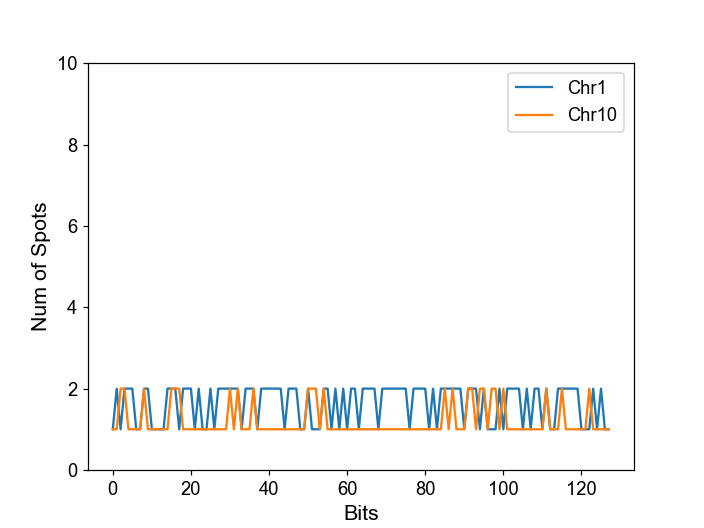

In [539]:
plt.figure()
plt.plot( chr_bit_usage_dict['1'], label='Chr1')
plt.plot( chr_bit_usage_dict['10'], label='Chr10')
plt.xlabel('Bits', fontsize=14)
plt.ylabel('Num of Spots', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
#plt.xlim([0,128])
plt.ylim([0,10])
plt.show()

<IPython.core.display.Javascript object>


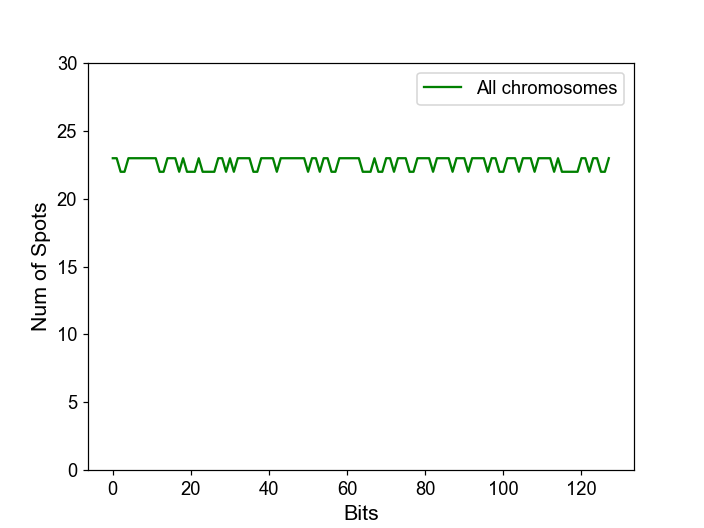

In [543]:
plt.figure()
plt.plot( total_bit_usage, 'g', label='All chromosomes')
plt.xlabel('Bits', fontsize=14)
plt.ylabel('Num of Spots', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
#plt.xlim([0,128])
plt.ylim([0,30])
plt.show()

<IPython.core.display.Javascript object>


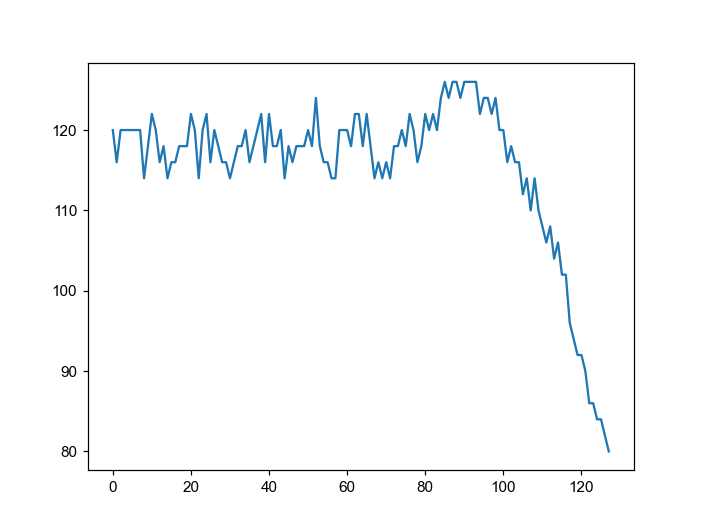

In [328]:
# 15,30,62,127
bid = 128

plt.figure()
plt.plot((encoding_matrix_dict[bid][:].sum(0)+len(encoding_matrix_dict[bid])))


In [287]:
_total_usage_list

[12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 11.0,
 11.0,
 10.0,
 10.0,
 10.0,
 11.0,
 12.0,
 11.0,
 11.0,
 11.0,
 11.0,
 10.0,
 11.0,
 10.0,
 10.0,
 11.0,
 10.0,
 10.0,
 10.0,
 11.0,
 10.0,
 10.0,
 10.0,
 11.0,
 10.0,
 10.0,
 10.0,
 11.0,
 11.0,
 10.0,
 10.0,
 10.0,
 11.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 11.0,
 10.0,
 10.0,
 10.0,
 11.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 11.0,
 10.0,
 10.0,
 10.0,
 11.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 11.0,
 10.0,
 10.0,
 10.0,
 11.0,
 10.0,
 10.0,
 10.0,
 10.0,
 11.0,
 10.0,
 10.0,
 10.0,
 11.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 11.0,
 10.0,
 10.0,
 10.0,
 11.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 11.0,
 10.0,
 10.0,
 10.0,
 11.0,
 10.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,

In [331]:
cand_se_encoding_mat.sum(0) + len(cand_se_encoding_mat)

array([126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126,
       126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126,
       126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126,
       126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126,
       126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126,
       126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126,
       126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126,
       126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126,
       126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126,
       126, 126, 126, 126, 126, 126, 126, 126, 126, 126,   0])

In [336]:
# load requirements
bid = 128
chr_2_region_num = pickle.load(open(os.path.join(library_folder,'chr_2_region_num.pkl'), 'rb'))

cand_se_encoding_mat = encoding_matrix_dict[bid]#[7:]
cand_se_bits = convert_matrix_to_bits(cand_se_encoding_mat)


# assign into different chromosomes
cand_bits = list(cand_se_bits)
total_bit_usage = np.zeros(np.max(cand_bits)+1)
chr_bit_usage_dict = {}
chr_2_region_bits = {}
for _chr, _num in sorted(chr_2_region_num.items(), key=lambda v:-v[1]):
    print(_chr, _num)
    chr_2_region_bits[_chr] = []
    # try to assign as even as possible for this chr
    _chr_bit_usage = np.zeros(np.max(cand_bits)+1)
    
    while len(chr_2_region_bits[_chr]) < _num:
        # for each cand_bit, estimate overlap
        _chr_usage_list = [np.sum(_chr_bit_usage[_bits]**2) for _bits in cand_bits]
        _total_usage_list = [np.sum(total_bit_usage[_bits]**2) for _bits in cand_bits]
        # find the least overlapping candidate
        _least_overlap_ind = []
        _chr_usage_th = np.min(_chr_usage_list)
        _total_usage_th = np.min(_total_usage_list)
        while len(_least_overlap_ind) == 0:
            _least_overlap_ind = np.intersect1d(np.where(np.array(_chr_usage_list)<=_chr_usage_th)[0], 
                                                np.where(np.array(_total_usage_list)<=_total_usage_th)[0])
            _total_usage_th += 1
        _least_overlap_ind = _least_overlap_ind[np.random.randint(len(_least_overlap_ind))]
        
        print(_chr_bit_usage[cand_bits[_least_overlap_ind]], total_bit_usage[cand_bits[_least_overlap_ind]],  _sel_cand)
        _sel_cand = cand_bits.pop(_least_overlap_ind)
        
        # update overlap list and chr_2_region_bits
        chr_2_region_bits[_chr].append(_sel_cand)
        _chr_bit_usage[_sel_cand] += 1
        total_bit_usage[_sel_cand] += 1
    
    chr_bit_usage_dict[_chr] = _chr_bit_usage


11 104
[0. 0. 0.] [0. 0. 0.] [ 57 104 105]
[0. 0. 0.] [0. 0. 0.] [ 63  92 118]
[0. 0. 0.] [0. 0. 0.] [16 83 86]
[0. 0. 0.] [0. 0. 0.] [ 10 106 121]
[0. 0. 0.] [0. 0. 0.] [25 55 69]
[0. 0. 0.] [0. 0. 0.] [ 27 110 126]
[0. 0. 0.] [0. 0. 0.] [ 6 30 34]
[0. 0. 0.] [0. 0. 0.] [ 20  96 102]
[0. 0. 0.] [0. 0. 0.] [ 50  75 104]
[0. 0. 0.] [0. 0. 0.] [ 12 108 111]
[0. 0. 0.] [0. 0. 0.] [23 68 73]
[0. 0. 0.] [0. 0. 0.] [ 1 47 64]
[0. 0. 0.] [0. 0. 0.] [57 80 87]
[0. 0. 0.] [0. 0. 0.] [11 32 35]
[0. 0. 0.] [0. 0. 0.] [39 76 77]
[0. 0. 0.] [0. 0. 0.] [28 65 95]
[0. 0. 0.] [0. 0. 0.] [36 66 94]
[0. 0. 0.] [0. 0. 0.] [49 70 82]
[0. 0. 0.] [0. 0. 0.] [ 52 103 109]
[0. 0. 0.] [0. 0. 0.] [ 7 17 22]
[0. 0. 0.] [0. 0. 0.] [ 4 31 33]
[0. 0. 0.] [0. 0. 0.] [ 15  89 127]
[0. 0. 0.] [0. 0. 0.] [ 44  71 101]
[0. 0. 0.] [0. 0. 0.] [  3  93 113]
[0. 0. 0.] [0. 0. 0.] [ 38  97 107]
[0. 0. 0.] [0. 0. 0.] [ 29  98 116]
[0. 0. 0.] [0. 0. 0.] [ 19  90 125]
[0. 0. 0.] [0. 0. 0.] [ 0  9 13]
[0. 0. 0.] [0. 0. 0.] [18 5

[1. 1. 1.] [5. 5. 5.] [ 29  93 118]
[1. 1. 1.] [5. 5. 5.] [ 57  95 119]
[1. 1. 1.] [5. 5. 5.] [22 45 59]
[1. 1. 1.] [5. 5. 5.] [ 1 69 75]
[1. 1. 1.] [5. 5. 5.] [ 54  99 125]
[1. 1. 1.] [5. 5. 5.] [ 8 66 84]
[1. 1. 1.] [5. 5. 5.] [30 74 89]
[1. 1. 1.] [5. 5. 5.] [ 14  82 106]
[1. 1. 1.] [5. 5. 5.] [ 43  65 102]
[1. 1. 1.] [5. 5. 5.] [ 36  86 117]
[1. 1. 1.] [5. 5. 5.] [ 35 108 123]
[1. 1. 1.] [5. 5. 5.] [ 38  80 104]
[1. 1. 1.] [6. 5. 5.] [46 91 92]
[1. 1. 1.] [5. 6. 5.] [15 70 71]
[1. 1. 1.] [5. 6. 5.] [ 5 42 55]
[1. 1. 1.] [5. 5. 6.] [20 41 50]
[1. 1. 1.] [5. 6. 5.] [  4  79 115]
[1. 1. 1.] [5. 5. 6.] [ 25  88 116]
[1. 1. 1.] [6. 6. 5.] [ 40 109 114]
[1. 1. 1.] [6. 6. 6.] [ 31 101 103]
[1. 1. 1.] [6. 6. 6.] [ 3 16 18]
[1. 1. 1.] [6. 6. 6.] [29 67 85]
[1. 1. 1.] [6. 6. 6.] [ 9 32 34]
[1. 1. 1.] [6. 6. 6.] [19 62 78]
[1. 1. 1.] [6. 6. 6.] [47 72 77]
4 69
[0. 0. 0.] [6. 6. 6.] [27 61 64]
[0. 0. 0.] [6. 6. 6.] [ 17  90 106]
[0. 0. 0.] [6. 6. 6.] [ 55 105 125]
[0. 0. 0.] [6. 6. 6.] [ 43  9

[0. 0. 0.] [11. 11. 11.] [ 41  83 104]
[0. 0. 0.] [11. 11. 11.] [ 9 18 24]
[0. 0. 0.] [11. 11. 11.] [16 59 79]
[0. 0. 0.] [11. 11. 11.] [25 72 86]
[0. 0. 0.] [11. 11. 11.] [ 53 112 126]
[0. 0. 0.] [11. 11. 11.] [ 51  87 110]
[0. 0. 0.] [11. 11. 11.] [20 49 58]
[0. 0. 0.] [11. 11. 11.] [ 39  70 102]
[0. 0. 0.] [11. 11. 11.] [37 73 82]
[0. 0. 0.] [11. 11. 11.] [ 71 116 118]
[0. 0. 0.] [11. 11. 11.] [10 32 45]
[0. 0. 1.] [11. 11. 11.] [ 23  97 117]
[1. 0. 0.] [11. 11. 11.] [19 33 38]
[0. 0. 1.] [11. 11. 11.] [ 11 124 125]
[0. 1. 1.] [11. 11. 11.] [ 1 42 46]
[1. 1. 0.] [11. 11. 11.] [55 77 93]
[1. 1. 1.] [11. 11. 11.] [2 3 4]
[1. 1. 1.] [11. 11. 11.] [ 13 111 122]
[1. 1. 1.] [11. 11. 11.] [ 15  91 106]
[1. 1. 1.] [11. 11. 11.] [21 31 44]
[1. 1. 1.] [11. 11. 11.] [ 5 64 85]
[1. 1. 1.] [11. 11. 11.] [ 56  84 121]
[1. 1. 1.] [11. 11. 11.] [17 80 81]
[1. 1. 1.] [11. 11. 11.] [ 12 103 127]
[1. 1. 1.] [11. 11. 11.] [ 61  88 107]
[1. 1. 1.] [11. 11. 11.] [ 7 27 30]
6 54
[0. 0. 0.] [11. 11. 11.] [

[0. 1. 0.] [16. 16. 16.] [ 8 47 50]
[0. 0. 1.] [16. 16. 16.] [ 2 20 23]
[0. 0. 1.] [16. 16. 16.] [19 56 63]
[0. 1. 0.] [16. 16. 16.] [ 61  94 118]
[1. 0. 0.] [16. 16. 16.] [ 21 117 127]
[1. 0. 1.] [16. 16. 16.] [12 17 28]
[1. 1. 1.] [16. 16. 16.] [ 11 100 110]
[1. 1. 1.] [16. 16. 16.] [ 0 25 27]
[1. 1. 1.] [16. 16. 16.] [43 83 98]
14 40
[0. 0. 0.] [16. 16. 16.] [48 68 79]
[0. 0. 0.] [16. 16. 16.] [34 75 80]
[0. 0. 0.] [16. 16. 16.] [ 4 22 24]
[0. 0. 0.] [16. 16. 16.] [41 65 69]
[0. 0. 0.] [16. 16. 16.] [  1 121 125]
[0. 0. 0.] [16. 16. 16.] [46 67 70]
[0. 0. 0.] [16. 16. 16.] [ 26 102 108]
[0. 0. 0.] [16. 16. 16.] [  9 104 124]
[0. 0. 0.] [16. 16. 16.] [29 82 95]
[0. 0. 0.] [16. 16. 16.] [ 33  78 101]
[0. 0. 0.] [16. 16. 16.] [14 42 49]
[0. 0. 0.] [16. 16. 16.] [ 6 84 99]
[0. 0. 0.] [16. 16. 16.] [ 40 105 120]
[0. 0. 0.] [16. 16. 16.] [ 13  93 109]
[0. 0. 0.] [16. 17. 16.] [ 74 116 123]
[0. 0. 0.] [17. 16. 16.] [ 55 103 119]
[0. 0. 0.] [16. 16. 17.] [16 64 73]
[0. 0. 0.] [16. 16. 17.] 

[0. 0. 0.] [21. 21. 21.] [10 52 55]
[0. 0. 0.] [21. 21. 21.] [ 9 78 92]
[0. 0. 0.] [21. 21. 21.] [13 39 51]
[0. 0. 0.] [21. 21. 21.] [ 31  83 106]
19 23
[0. 0. 0.] [21. 21. 21.] [20 35 53]
[0. 0. 0.] [21. 21. 21.] [ 66 116 127]
[0. 0. 0.] [21. 21. 21.] [  4  76 111]
[0. 0. 0.] [21. 21. 21.] [ 56  90 102]
[0. 0. 0.] [21. 21. 21.] [14 18 23]
[0. 0. 0.] [21. 21. 21.] [ 24  80 113]
[0. 0. 0.] [21. 21. 21.] [27 67 77]
[0. 0. 0.] [21. 21. 21.] [33 86 87]
[0. 0. 0.] [21. 21. 21.] [36 69 84]
[0. 0. 0.] [21. 21. 21.] [ 25  82 105]
[0. 0. 0.] [21. 21. 21.] [29 74 81]
[0. 0. 0.] [21. 22. 21.] [ 64 101 119]
[0. 0. 0.] [21. 22. 21.] [ 57  92 120]
[0. 0. 0.] [22. 21. 21.] [ 7 40 44]
[0. 0. 0.] [21. 22. 21.] [ 71 115 122]
[0. 0. 0.] [22. 21. 22.] [ 3 35 41]
[0. 0. 0.] [21. 22. 22.] [ 1 70 78]
[0. 0. 0.] [22. 22. 21.] [21 32 38]
[0. 0. 0.] [22. 22. 22.] [ 49 103 121]
[0. 0. 0.] [22. 22. 22.] [ 8 48 63]
[0. 0. 0.] [22. 22. 22.] [ 58 123 124]
[0. 0. 0.] [22. 22. 22.] [30 54 61]
[0. 0. 0.] [22. 22. 22.] 

In [ ]:
# check distance

In [335]:
len(chr_2_region_bits['11'])

104

In [319]:
_mat = convert_bits_to_matrix(np.array(chr_2_region_bits['11']))

In [341]:
_b

array([  6, 122, 127])

In [387]:
def calculate_closest_overlap(code_list, code, _localtion):
    """Calculate the closest neighbor of certain code at certain location"""
    if _localtion > len(code_list) or _localtion < 0:
        raise ValueError(f"invalid _location")
    _code_list = np.array(code_list)
    if len(_code_list) == 0:
        return np.inf
    else:
        _min_dists = []
        for _c in code:
            if not (_code_list==_c).any():
                _min_dists.append(np.inf)
            else:
                _match_loc,_  = np.where(_code_list == _c)
                _dists = np.abs(_match_loc - _localtion)
                _dists[_match_loc >= _localtion] += 1
                _min_dists.append(np.min(_dists))

    return np.float(np.min(_min_dists))
        

In [347]:
calculate_closest_overlap(sel_bits[1:], sel_bits[0], 1)

45

In [452]:
test = [[1,2],[3,4],[5,6]]
test.insert(3,[7,10])
print(test)

[[1, 2], [3, 4], [5, 6], [7, 10]]


In [458]:
random.shuffle(test)
print(test)

[[3, 4], [1, 2], [5, 6], [7, 10]]


In [515]:
_chr = '1'
sel_bits = np.array(chr_2_region_bits[_chr])
code_degrees = np.array([np.sum(chr_bit_usage_dict[_chr][_b])-3 for _b in sel_bits])

final_codes = []
final_dist = 0

# it seems the random doesnt help
for _iter in range(1):
    ordered_codes = []
    #ordered_codes = [tuple(_c) for _c in sel_bits[np.where(code_degrees==np.min(code_degrees))]]
    #random.shuffle(ordered_codes)
    #for _degree in np.unique(code_degrees)[1:]:
    for _degree in np.unique(code_degrees):
        _cand_codes = [tuple(_c) for _c in sel_bits[np.where(code_degrees==_degree)]]
        #print(_cand_codes, len(_cand_codes))
        #random.shuffle(_cand_codes)
        #print(_cand_codes, len(_cand_codes))
        for _code in _cand_codes:
            _dists = []
            for _i in range(0, len(ordered_codes)+1):
                _dists.append(calculate_closest_overlap(ordered_codes, _code, _i))
            ordered_codes.insert(np.argmax(_dists), _code)
            #print(_dists, np.argmax(_dists))

    # check order
    final_dists = []
    for _i, _code in enumerate(ordered_codes):
        _other_codes = [_c for _j, _c in enumerate(ordered_codes) if _i != _j]
        final_dists.append(calculate_closest_overlap(_other_codes, _code, _i))
    if min(final_dists) > final_dist:
        final_dist = min(final_dists)
        final_codes = [np.array(_c) for _c in ordered_codes]
        print(min(final_dists), 'change')
    

15.0 change


In [516]:
final_dists = []
for _i, _code in enumerate(final_codes):
    _other_codes = [_c for _j, _c in enumerate(final_codes) if _i != _j]
    final_dists.append(calculate_closest_overlap(_other_codes, _code, _i))

<IPython.core.display.Javascript object>


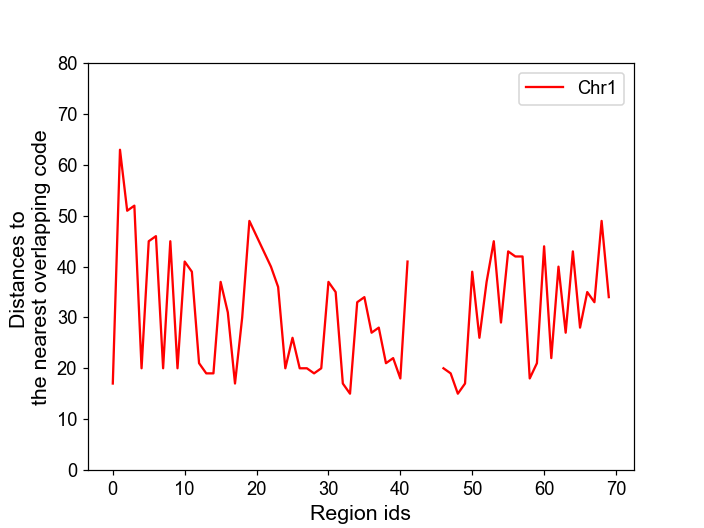

In [547]:
plt.figure()
plt.plot( final_dists, 'r', label=f'Chr{_chr}')
plt.xlabel('Region ids', fontsize=14)
plt.ylabel('Distances to \nthe nearest overlapping code', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
#plt.xlim([0,128])
plt.ylim([0,80])
plt.show()

<IPython.core.display.Javascript object>


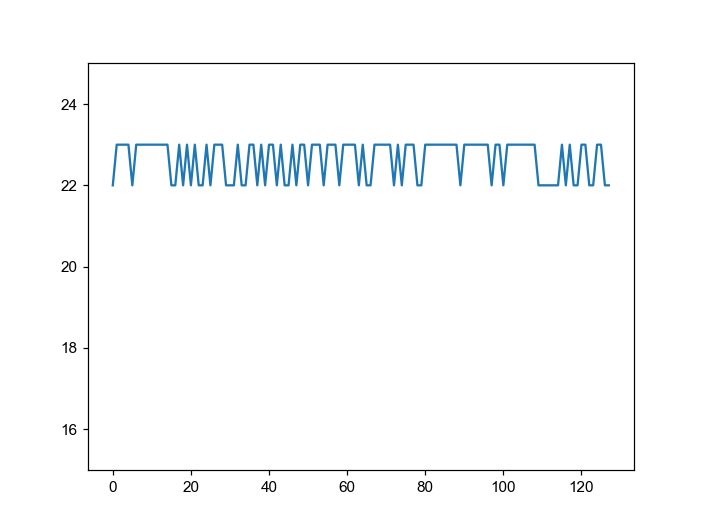

In [334]:
plt.figure()
plt.plot(total_bit_usage)
plt.ylim([15,25])
plt.show()

In [266]:
?itertools.combinations

In [248]:
import random

In [252]:
?random.shuffle

In [268]:
expand_matrix(solution_matrix_dict[5])

previous num of bits: 5, on bits: 3
10 [(2, 4), (1, 2), (1, 3), (3, 4), (2, 3), (0, 1), (1, 4), (0, 2), (0, 4), (0, 3)]
(2, 4) 3 [8 8]
(1, 3) 4 [8 8 8]
4 selected for 6 bits in 0.002s.


array([[ 1,  1,  1, -1, -1, -1],
       [ 1, -1, -1,  1,  1, -1],
       [-1, -1,  1, -1,  1,  1],
       [-1,  1, -1,  1, -1,  1]])

In [ ]:
encoding_mat = 

In [164]:
_dists = (_matrix @ _matrix.transpose()-99)

In [167]:
max(_dists[_dists < 0])

-8

In [159]:
_matrix = np.ones([len(encoding_table), np.max(encoding_table)], dtype=np.int) * -1
for _i, _bits in enumerate(encoding_table):
    _matrix[_i, _bits-1] = 1

In [160]:
_matrix

array([[ 1,  1, -1, ..., -1, -1, -1],
       [ 1, -1,  1, ..., -1, -1, -1],
       [ 1, -1, -1, ..., -1, -1, -1],
       ...,
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1]])

# Generate hamming code,

In [76]:
solution_matrix_dict = {3:np.array([[1,1,1]])}

In [27]:
import itertools

In [105]:
solution_matrix_dict = {4:np.array([[1,1,1,1]])}

In [127]:
solution_matrix_dict = {3:np.array([[1,1,1]])}

In [146]:
for _i in range(max(list(solution_matrix_dict.keys())),301):
    solution_matrix_dict[_i+1] = expand_matrix(solution_matrix_dict[_i])

previous num of bits: 254, on bits: 3


KeyboardInterrupt: 

<IPython.core.display.Javascript object>


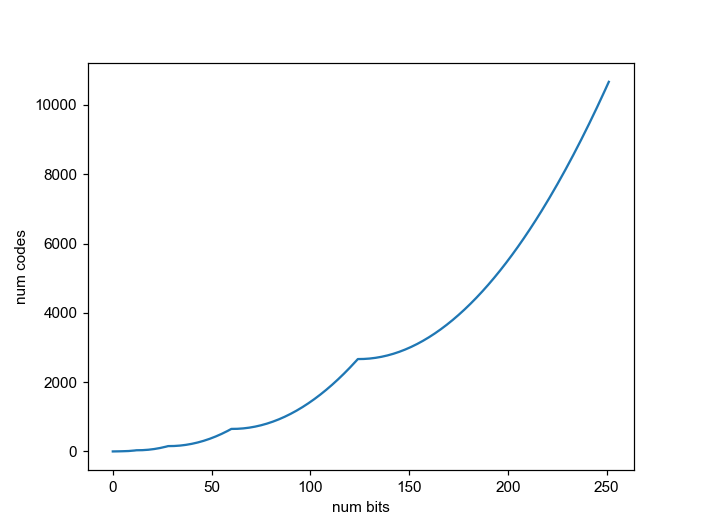

In [168]:
plt.figure()
plt.plot([len(_v) for _k, _v in solution_matrix_dict.items()])
plt.xlabel('num bits')
plt.ylabel('num codes')
plt.show()

In [238]:
pickle.dump(solution_matrix_dict, open(os.path.join(encoding_folder, 'parsimonious_onbit_3_hdist_3.pkl'), 'wb'))

<IPython.core.display.Javascript object>


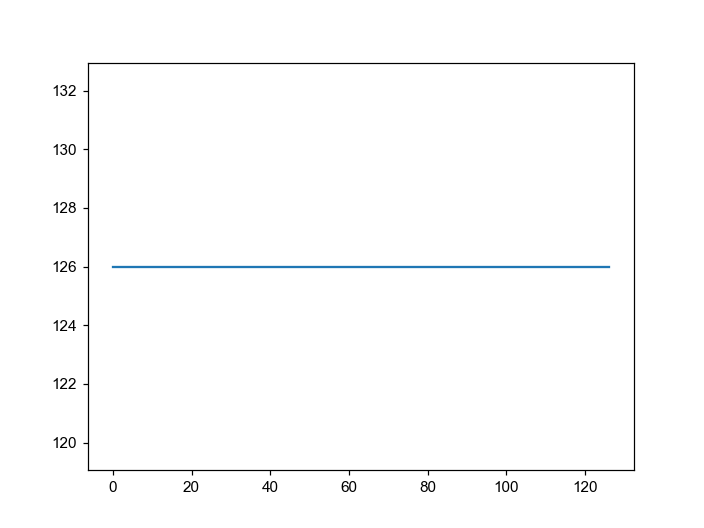

In [228]:
# 15,30,62,127
bid = 127

plt.figure()
plt.plot((solution_matrix_dict[bid][:].sum(0)+len(solution_matrix_dict[bid])))


In [229]:
cand_se_encoding_mat = solution_matrix_dict[127]#[7:]

cand_se_bits = convert_matrix_to_bits(cand_se_encoding_mat)

In [231]:
chr_2_region_num

{'1': 70,
 '14': 40,
 '6': 54,
 '16': 32,
 '5': 55,
 '8': 50,
 '7': 60,
 '11': 104,
 '15': 48,
 '2': 91,
 '3': 34,
 '12': 35,
 '17': 38,
 '18': 18,
 '9': 55,
 '10': 51,
 '4': 69,
 '19': 23,
 '13': 38,
 'X': 1}

In [232]:
# load requirements
chr_2_region_num = pickle.load(open(os.path.join(library_folder,'chr_2_region_num.pkl'), 'rb'))

cand_se_encoding_mat = solution_matrix_dict[127]#[7:]

cand_se_bits = convert_matrix_to_bits(cand_se_encoding_mat)

# assign into different chromosomes
cand_bits = list(cand_se_bits)
total_bit_usage = np.zeros(np.max(cand_bits)+1)
chr_2_region_bits = {}
for _chr, _num in sorted(chr_2_region_num.items(), key=lambda v:-v[1]):
    print(_chr, _num)
    chr_2_region_bits[_chr] = []
    # try to assign as even as possible for this chr
    _chr_bit_usage = np.zeros(np.max(cand_bits)+1)
    
    while len(chr_2_region_bits[_chr]) < _num:
        # for each cand_bit, estimate overlap
        _chr_usage_list = [np.sum(_chr_bit_usage[_bits]) for _bits in cand_bits]
        _total_usage_list = [np.sum(total_bit_usage[_bits]) for _bits in cand_bits]
        # find the least overlapping candidate
        _least_overlap_ind = np.intersect1d(np.where(np.array(_chr_usage_list)==np.min(_chr_usage_list))[0], 
                                            np.where(np.array(_total_usage_list)==np.min(_total_usage_list))[0])
        
        print(_chr_bit_usage[cand_bits[_least_overlap_ind]], _sel_cand)
        _sel_cand = cand_bits.pop(_least_overlap_ind)
        
        # update overlap list and chr_2_region_bits
        chr_2_region_bits[_chr].append(_sel_cand)
        _chr_bit_usage[_sel_cand] += 1
        total_bit_usage[_sel_cand] += 1
    
    

11 104
[0. 0. 0.] [12 17 30]
[0. 0. 0.] [0 1 2]
[0. 0. 0.] [ 3  7 11]
[0. 0. 0.] [ 5 10 12]
[0. 0. 0.] [ 6  8 13]
[0. 0. 0.] [ 4  9 14]
[0. 0. 0.] [15 31 47]
[0. 0. 0.] [17 34 48]
[0. 0. 0.] [18 32 49]
[0. 0. 0.] [16 33 50]
[0. 0. 0.] [23 43 51]
[0. 0. 0.] [25 46 52]
[0. 0. 0.] [26 44 53]
[0. 0. 0.] [24 45 54]
[0. 0. 0.] [27 35 55]
[0. 0. 0.] [29 38 56]
[0. 0. 0.] [30 36 57]
[0. 0. 0.] [28 37 58]
[0. 0. 0.] [19 39 59]
[0. 0. 0.] [21 42 60]
[0. 0. 0.] [22 40 61]
[1. 0. 0.] [20 41 62]
[1. 0. 0.] [ 0 63 64]
[1. 0. 0.] [ 5 65 67]
[1. 0. 0.] [ 2 68 69]
[1. 0. 0.] [ 3 66 70]
[1. 0. 0.] [ 1 71 73]
[1. 0. 0.] [ 4 72 75]
[1. 0. 0.] [26 74 79]
[1. 0. 0.] [27 76 80]
[1. 0. 0.] [28 78 81]
[1. 0. 0.] [ 6 82 83]
[1. 0. 0.] [23 77 85]
[1. 0. 0.] [12 84 87]
[1. 0. 0.] [13 86 88]
[1. 0. 0.] [57 89 95]
[1. 0. 0.] [59 92 96]
[1. 0. 0.] [56 90 97]
[1. 0. 0.] [60 93 98]
[1. 0. 0.] [55 91 99]
[1. 0. 0.] [ 14 102 103]
[1. 0. 0.] [ 11 100 104]
[1. 0. 0.] [ 52  94 105]
[1. 0. 0.] [  9 101 107]
[1. 0. 0.] [ 29 

[0. 0. 0.] [ 46  72 101]
[0. 0. 0.] [ 55  94 102]
[0. 0. 0.] [ 56  80 103]
[0. 0. 0.] [ 57  82 104]
[0. 0. 0.] [ 61  83 105]
[1. 0. 0.] [ 58  79 106]
[1. 0. 0.] [ 1 64 66]
[1. 0. 0.] [ 0 67 68]
[1. 0. 0.] [ 3 65 69]
[1. 0. 0.] [14 70 71]
[1. 0. 0.] [ 2 76 77]
[1. 0. 0.] [11 85 89]
[1. 0. 0.] [13 84 90]
[1. 0. 0.] [ 4 88 91]
[1. 0. 0.] [ 9 86 92]
[1. 0. 0.] [ 5 87 93]
[1. 0. 0.] [ 30 110 111]
[1. 0. 0.] [ 27 108 112]
[1. 0. 0.] [  6 114 115]
[1. 0. 0.] [ 24 107 116]
[1. 0. 0.] [ 21 109 119]
[1. 0. 0.] [ 10 113 120]
[1. 1. 0.] [  7 118 126]
[1. 1. 0.] [ 15 101 117]
[1. 1. 0.] [  8 114 121]
[1. 1. 0.] [ 16 105 122]
[1. 1. 0.] [ 12 112 123]
[1. 1. 0.] [ 17 110 124]
[1. 1. 1.] [ 18 108 125]
[1. 1. 1.] [23 39 47]
[1. 1. 1.] [25 42 48]
[1. 1. 1.] [26 40 49]
[1. 1. 1.] [19 38 50]
[1. 1. 1.] [20 32 51]
[1. 1. 1.] [22 33 52]
[1. 1. 1.] [28 41 54]
5 55
[0. 0. 0.] [29 37 55]
[0. 0. 0.] [1 4 6]
[0. 0. 0.] [ 2  7 10]
[0. 0. 0.] [ 5  9 11]
[0. 0. 0.] [ 0 13 14]
[0. 0. 0.] [ 3 15 19]
[0. 0. 0.] [ 8 16

[0. 0. 0.] [11 36 40]
[0. 0. 0.] [12 38 41]
[0. 0. 0.] [14 32 45]
[0. 0. 0.] [24 43 52]
[0. 0. 0.] [10 50 55]
[0. 0. 0.] [ 8 47 56]
[0. 0. 0.] [29 73 83]
[0. 0. 0.] [44 76 95]
[0. 0. 0.] [48 79 96]
[0. 0. 0.] [51 85 97]
[0. 0. 0.] [49 80 98]
[0. 0. 0.] [53 81 99]
[0. 0. 0.] [ 42  77 100]
[0. 0. 0.] [ 58  92 101]
[0. 0. 0.] [ 46  71 102]
[0. 0. 0.] [ 60  84 103]
[0. 0. 0.] [ 54  93 104]
[0. 0. 0.] [ 62  82 107]
[0. 0. 0.] [ 57  86 108]
[0. 0. 0.] [ 59  75 111]
[1. 0. 0.] [ 61  78 112]
[1. 0. 0.] [ 5 64 70]
[1. 0. 0.] [ 8 63 72]
[1. 0. 0.] [ 7 66 74]
[1. 0. 0.] [25 65 87]
[1. 0. 0.] [27 68 88]
[1. 0. 0.] [29 67 89]
[1. 0. 0.] [28 69 90]
[1. 0. 0.] [ 2 91 94]
17 38
[0. 0. 0.] [  3 105 109]
[0. 0. 0.] [ 5 18 20]
[0. 0. 0.] [ 6 16 21]
[0. 0. 0.] [ 2 19 22]
[0. 0. 0.] [ 0 23 24]
[0. 0. 0.] [ 7 17 25]
[0. 0. 0.] [10 15 26]
[0. 0. 0.] [ 1 27 29]
[0. 0. 0.] [ 4 32 35]
[0. 0. 0.] [ 3 33 37]
[0. 0. 0.] [12 36 39]
[0. 0. 0.] [ 8 31 40]
[0. 0. 0.] [14 34 43]
[0. 0. 0.] [28 46 49]
[0. 0. 0.] [13 53 

In [224]:
np.unique(np.concatenate(list(chr_2_region_bits.values())), return_counts=True)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119]),
 array([36, 34, 36, 34, 34, 34, 33, 34, 31, 30, 31, 31, 32, 32, 31, 31, 31,
        31, 30, 31, 27, 30, 31, 32, 29, 30, 29, 30, 28, 28, 30, 26, 27, 26,
        26, 26, 26, 28, 28, 27, 30, 27, 25, 26, 27, 25, 25, 30, 29, 29, 27,
        26, 25, 25, 25, 25, 26, 22, 22, 22, 20, 21, 20, 22, 22, 24, 21, 23,
        22, 22

In [212]:
_chr_bit_usage[_sel_cand]

array([1., 1., 1.])

In [198]:
chr_2_region_bits

{'11': [array([0, 7, 8]),
  array([1, 7, 9]),
  array([2, 8, 9]),
  array([ 0,  9, 10]),
  array([ 1,  8, 10]),
  array([ 2,  7, 10]),
  array([ 3,  7, 11]),
  array([ 4,  8, 11]),
  array([ 5,  9, 11]),
  array([ 6, 10, 11]),
  array([ 0, 11, 12]),
  array([ 3,  8, 12]),
  array([ 4,  7, 12]),
  array([ 5, 10, 12]),
  array([ 6,  9, 12]),
  array([ 1, 11, 13]),
  array([ 2, 12, 13]),
  array([ 3,  9, 13]),
  array([ 4, 10, 13]),
  array([ 5,  7, 13]),
  array([ 6,  8, 13]),
  array([ 0, 13, 14]),
  array([ 1, 12, 14]),
  array([ 2, 11, 14]),
  array([ 3, 10, 14]),
  array([ 4,  9, 14]),
  array([ 5,  8, 14]),
  array([ 6,  7, 14]),
  array([ 0, 15, 16]),
  array([ 1, 15, 17]),
  array([ 2, 16, 17]),
  array([ 0, 17, 18]),
  array([ 1, 16, 18]),
  array([ 2, 15, 18]),
  array([ 3, 15, 19]),
  array([ 4, 16, 19]),
  array([ 5, 17, 19]),
  array([ 6, 18, 19]),
  array([ 0, 19, 20]),
  array([ 3, 16, 20]),
  array([ 4, 15, 20]),
  array([ 5, 18, 20]),
  array([ 6, 17, 20]),
  array([ 1, 1